<a href="https://colab.research.google.com/github/priya606/car-price-prediction-in-ML/blob/main/class_25(car_price_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demonstrating car-price-prediction i.e.,determining price of old cars

# data analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('car data.csv')

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
data.drop('Car_Name',axis='columns',inplace=True)

In [ ]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data['cuurent_Year']=2021

In [ ]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,cuurent_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [ ]:
data['actual_year']=0

In [ ]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,cuurent_Year,actual_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,0


In [ ]:
data['actual_year']=data['cuurent_Year']-data['Year']

In [ ]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,cuurent_Year,actual_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [ ]:
data.drop('Year',axis='columns',inplace=True)

In [ ]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,cuurent_Year,actual_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


**here fuel_type,seller_type,transmission contains categorical data we need to convert it into numerical data for that we will use one hot encoding,we will use pandas dataframe by using get dummies function**

In [ ]:
final=pd.get_dummies(data,drop_first=True)

In [ ]:
final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,cuurent_Year,actual_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2021,7,0,1,0,1
1,4.75,9.54,43000,0,2021,8,1,0,0,1
2,7.25,9.85,6900,0,2021,4,0,1,0,1
3,2.85,4.15,5200,0,2021,10,0,1,0,1
4,4.60,6.87,42450,0,2021,7,1,0,0,1


# visualising the data

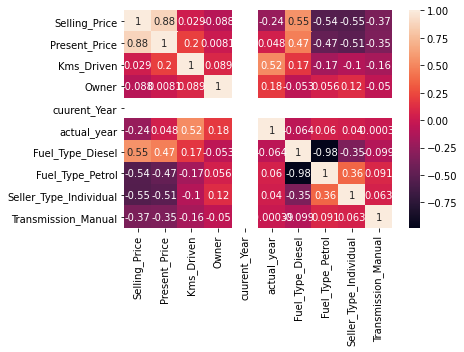

In [ ]:
import seaborn as sns
relation=final.corr()
sns.heatmap(relation,annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


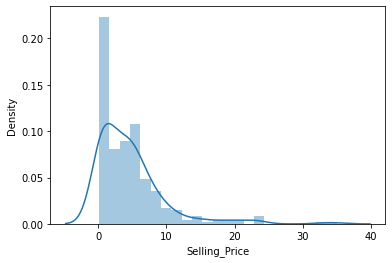

In [ ]:
sns.distplot(final['Selling_Price'])
plt.show()

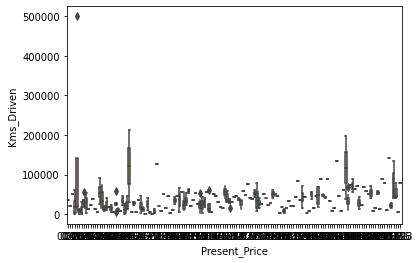

In [ ]:
sns.boxplot(data=final,x='Present_Price',y='Kms_Driven')
plt.show()

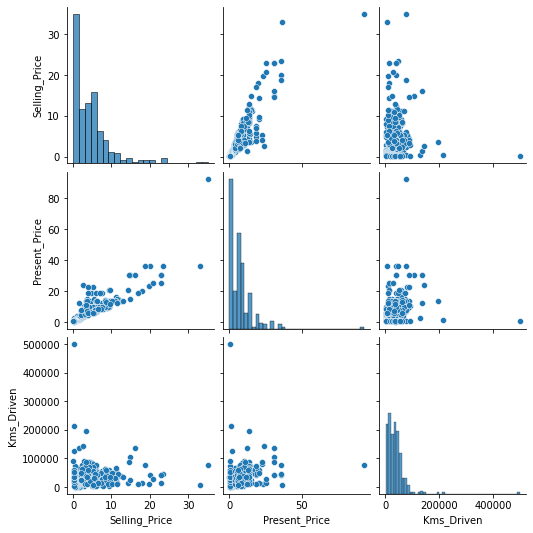

In [ ]:
sns.pairplot(final,vars=['Selling_Price','Present_Price','Kms_Driven'])
plt.show()

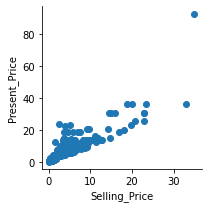

In [ ]:
sns.FacetGrid(final).map(plt.scatter,'Selling_Price','Present_Price')

# Fitting and evaluating the models

In [ ]:
final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,cuurent_Year,actual_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2021,7,0,1,0,1
1,4.75,9.54,43000,0,2021,8,1,0,0,1
2,7.25,9.85,6900,0,2021,4,0,1,0,1
3,2.85,4.15,5200,0,2021,10,0,1,0,1
4,4.60,6.87,42450,0,2021,7,1,0,0,1


In [ ]:
x=final.iloc[:,1:]
y=final.iloc[:,0]

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=44)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict=lr.predict(xtest)

In [ ]:
y_predict

array([ -0.22811417,   2.42365818,   0.32297924,   3.27891868,
         1.47394651,   8.01095837,   6.59635674,   8.8069886 ,
         4.83577568,   4.83283588,  -6.34729486,   1.69561797,
         4.70117199,   4.717958  ,   7.22104645,   7.70997476,
         1.15891378,   3.82337974,   8.89081399,   6.86450385,
         1.05758081,  11.60269782,   1.01432371,   7.67930893,
         1.30277619,   1.06431621,   4.7575789 ,   4.30305356,
         0.7959777 ,   4.21943281,   1.23530027,   5.64328796,
         0.91924479,   8.46211436,   1.37181912,   4.99060318,
         3.26420705,   3.77678413,   7.74954217,   1.5239059 ,
         2.93472171,   2.21308839,   4.29253849,   2.10934458,
         7.21524802,   4.22181084,   1.90120369,   6.40766451,
         5.27973561,   6.17206409,   4.32634142,  15.20227695,
         2.45179232,   1.06496802,   3.73483685,   0.71059519,
         6.07836272,   7.59746284,   0.13388223,  -0.02632934,
         5.60913411,   5.32244776,   1.61177808,  18.60

**for predicting car price we can use**
**1.linear regression
2.random forest
3.decision tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(xtrain,ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_predict=tree.predict(xtest)
y_predict

array([ 0.45,  1.7 ,  3.  ,  3.5 ,  2.  ,  7.4 ,  4.5 , 12.5 ,  4.5 ,
        5.25,  0.5 ,  2.55,  6.1 ,  5.  ,  4.75,  6.45,  0.48,  2.5 ,
       12.5 ,  5.5 ,  0.45, 17.  ,  1.1 ,  5.5 ,  0.48,  0.45,  5.25,
        4.75,  1.15,  2.85,  0.45,  4.9 ,  1.25,  8.99,  1.11,  5.25,
        0.45,  4.4 ,  8.75,  0.45,  2.1 ,  4.  ,  4.75,  1.05,  9.1 ,
        4.5 ,  1.2 ,  4.6 ,  3.5 ,  6.75,  4.75, 19.75,  3.6 ,  0.16,
        3.5 ,  0.65,  4.5 ,  8.75,  0.5 ,  0.3 ,  3.5 ,  5.3 ,  1.11,
       23.  ,  5.25,  0.42,  9.1 ,  4.5 ,  4.  ,  4.4 ,  6.25,  0.2 ,
        0.1 ,  6.1 ,  2.55,  7.75])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_predict=rf.predict(xtest)
y_predict

array([ 0.4915,  1.489 ,  3.0826,  4.1615,  1.705 ,  7.1635,  5.1355,
        9.3041,  4.816 ,  4.8645,  0.4672,  2.6645,  5.42  ,  5.383 ,
        5.278 ,  6.6695,  0.5312,  2.83  ,  7.2275,  5.721 ,  0.5166,
       15.1747,  1.0595,  6.025 ,  0.4436,  0.428 ,  4.8005,  4.4585,
        0.8288,  2.9065,  0.3229,  4.9755,  1.175 , 10.4662,  1.1262,
        4.807 ,  0.4325,  4.3795,  6.873 ,  0.4675,  3.4515,  3.2245,
        4.449 ,  1.0906,  8.705 ,  4.505 ,  1.1608,  4.5075,  3.709 ,
        6.7607,  4.536 , 15.7142,  3.4953,  0.2425,  3.825 ,  0.4095,
        5.7625,  7.1485,  0.3985,  0.2589,  3.736 ,  5.196 ,  1.1294,
       22.1786,  4.8   ,  0.4631,  8.6735,  4.8995,  3.026 ,  4.606 ,
        7.2865,  0.2284,  0.2071,  5.7845,  2.5335,  8.1225])

**By using cross-validation-score we can predict the average of models**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
lr=cross_val_score(LinearRegression(),x,y)
lr

array([  0.87081422,   0.78495686, -93.94826392,   0.59365768,
         0.82692649])

In [ ]:
np.average(lr)

-18.174381732283724

In [ ]:
dr=cross_val_score(DecisionTreeRegressor(),x,y)
dr

array([ 0.92804224,  0.60742049, -2.26541752,  0.8685847 ,  0.66639287])

In [ ]:
np.average(dr)

0.16100455535173536

In [ ]:
rf=cross_val_score(RandomForestRegressor(),x,y)
rf

array([ 0.96736018,  0.77287146, -1.44945234,  0.95128911,  0.7983437 ])

In [ ]:
np.average(rf)

0.40808242279432266

# from the above methods randomforest regression is having good accuracy we will tune the model by using Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestRegressor()

In [ ]:
random_grid={'n_estimators':n_estimators,
             'min_samples_leaf':min_samples_leaf}

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=10,stop=150,num=6)]
min_samples_leaf=[2,6,7,8]

In [ ]:
rf_random=RandomizedSearchCV(param_distributions=random_grid,estimator=rf)

In [ ]:
rf_random.fit(xtrain,ytrain)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

# Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
Er=ExtraTreesRegressor()
Er.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(Er.feature_importances_)

[0.39204656 0.04087914 0.00088078 0.         0.07581858 0.2182251
 0.01329518 0.12690257 0.13195208]


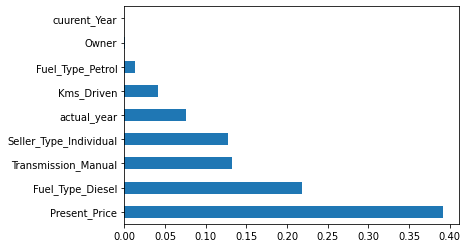

In [ ]:
feat_impor=pd.Series(Er.feature_importances_,index=x.columns)
feat_impor.nlargest(9).plot(kind='barh')

In [ ]:
final.to_csv('car_price_prediction_by_saipriya.csv')